In [82]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/acubillosunal/UBM-DEEP-LEARNING-1/main/init.py
import init; init.init(force_download=False); 

In [83]:
import tensorflow as tf
from time import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from local.lib import mlutils
%matplotlib inline

# **Convolutional Neural Networks**

Las redes neuronales convolucionales capturan y extraen hábilmente patrones de datos, revelando el arte oculto dentro de los píxeles.

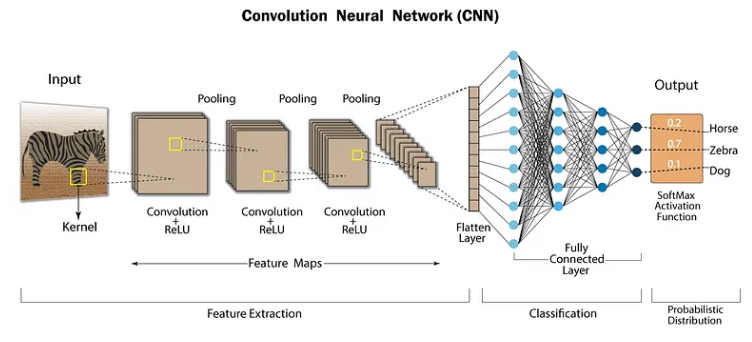

In [84]:
from IPython.display import Image
Image(filename='local/imgs/CNN.png', width=800)

## **Introducción:**

Las redes neuronales convolucionales (CNN) han revolucionado el campo de la visión por computadora, convirtiéndose en la piedra angular de las aplicaciones de análisis de imágenes y videos. Los componentes y operaciones hacen que las CNN sean poderosas, conceptos como convolución, agrupación máxima, longitud de zancada, relleno, muestreo ascendente, muestreo descendente las convierten en una herramienta muy útil. 

Las redes neuronales convolucionales (CNN) constan de varios tipos de capas que trabajan juntas para aprender representaciones jerárquicas a partir de datos de entrada. Cada capa juega un papel único en la arquitectura general. 

**1. Input Layer:** la capa de entrada es el punto de entrada de datos inicial para la red. En tareas basadas en imágenes, la capa de entrada representa los valores de píxeles de la imagen. En el siguiente ejemplo, supongamos que estamos trabajando con imágenes en escala de grises de un tamaño de 28x28 píxeles.

In [85]:
from tensorflow.keras.layers import Input

input_layer = Input(shape=(28, 28, 1))

**2. Convolutional Layer:** las capas convolucionales son los componentes básicos de las CNN. Estas capas aplican operaciones de convolución a los datos de entrada mediante filtros que se pueden aprender. Estos filtros escanean la entrada y extraen características como bordes, texturas y patrones.

In [86]:
from tensorflow.keras.layers import Conv2D

conv_layer = Conv2D(filters=32, kernel_size=(3, 3),
                    activation='relu')(input_layer)

En el contexto de las redes neuronales convolucionales (CNN), los términos "kernel" y "filtro" suelen usarse indistintamente y se refieren al mismo concepto. Analicemos lo que significan estos términos:

**2.1 Kernel:** Un kernel es una pequeña matriz utilizada en la operación de convolución. Es un conjunto de pesos que se pueden aprender y que se aplican a los datos de entrada para producir el mapa de características de salida. Los kernels son los elementos clave que permiten a las CNN aprender automáticamente jerarquías espaciales de características dentro de los datos de entrada. En el procesamiento de imágenes, un núcleo puede ser una matriz pequeña como 3x3 o 5x5.

**2.2 Filtro:** Un filtro, por otro lado, es un conjunto de múltiples núcleos. En la mayoría de los casos, una capa convolucional utiliza múltiples filtros para capturar diferentes características en los datos de entrada. Cada filtro convoluciona con la entrada para producir un mapa de características, y la red aprende a extraer varios patrones ajustando los pesos (parámetros) de estos filtros durante el entrenamiento.

En este ejemplo, estamos definiendo una capa convolucional con 32 filtros, cada uno con un tamaño de núcleo de 3x3. Durante el entrenamiento, la red neuronal ajusta los pesos (parámetros) de estos 32 filtros para aprender diferentes características a partir de los datos de entrada. Veámoslo con una imagen de ejemplo:

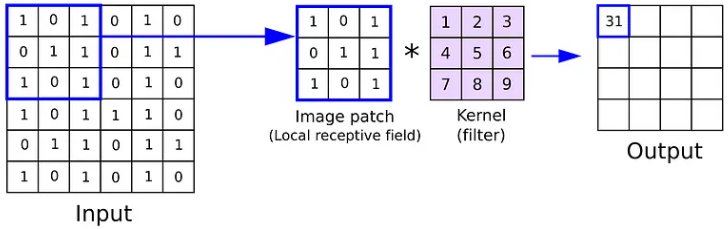

In [87]:
Image(filename='local/imgs/kernel_matrix.png', width=800)

**3. Capa de activación (ReLU):** después de la operación de convolución, se aplica una función de activación, a menudo Unidad lineal rectificada (ReLU), por elementos para introducir no linealidad en el modelo. ReLU ayuda a la red a aprender relaciones complejas y hace que el modelo sea más expresivo. Depende completamente de su caso de uso qué activación utilizará; en la mayoría de los casos, los investigadores usan ReLU, hay algunas activaciones que también se pueden usar, por ejemplo: Leaky ReLU, ELU.

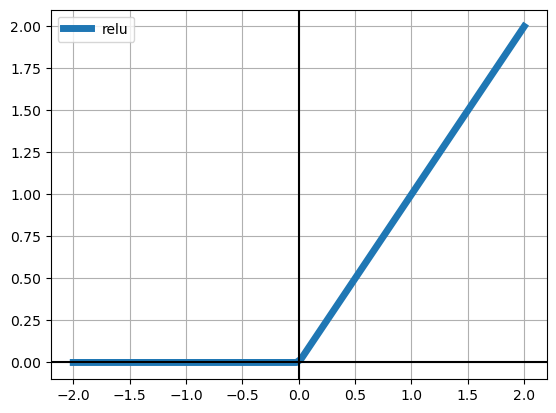

In [88]:
z = np.linspace(-2,2,100)

relu = np.vectorize(lambda z: z if z>0 else 0.)

plt.plot(z, relu(z), lw=5, label="relu")
plt.grid()
plt.axvline(0, color="black");
plt.axhline(0, color="black");
plt.legend()
plt.show()

**4. Capa de agrupación:** las capas de agrupación (por ejemplo, MaxPooling o AveragePooling) reducen las dimensiones espaciales de los mapas de características generados por las capas convolucionales. MaxPooling, por ejemplo, selecciona el valor máximo de un grupo de valores, centrándose en las características más destacadas.

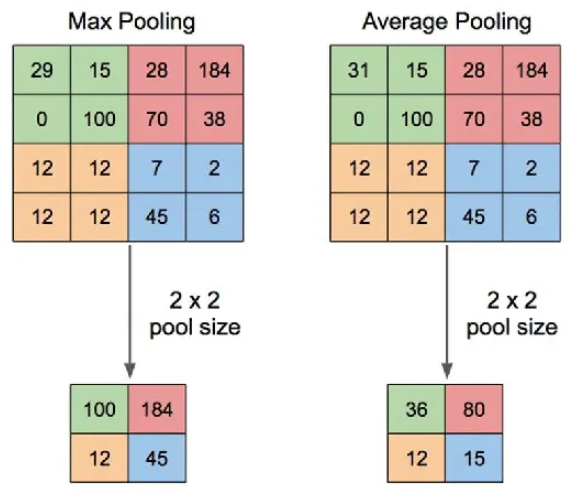

In [89]:
Image(filename = 'local/imgs/max_pooling.png')

Las capas de agrupación reducen las dimensiones espaciales. MaxPooling se usa comúnmente:

In [90]:
from tensorflow.keras.layers import MaxPooling2D

pooling_layer = MaxPooling2D(pool_size=(2, 2))(conv_layer)

**5. Fully Connected (Dense) Layer**: las capas completamente conectadas conectan cada neurona de una capa con cada neurona de la siguiente capa. Estas capas generalmente se encuentran hacia el final de la red, transformando las características aprendidas en predicciones o probabilidades de clase. Las capas completamente conectadas generalmente se usan hacia el final de la red. Para tareas de clasificación:

In [91]:
from tensorflow.keras.layers import Dense, Flatten

flatten_layer = Flatten()(pooling_layer)
dense_layer = Dense(units=128, activation='relu')(flatten_layer)

**6. Dropout Layer:** las capas de abandono se utilizan para la regularización y evitar el sobreajuste. Durante el entrenamiento, las neuronas aleatorias se "abandonan", lo que significa que se ignoran, lo que obliga a la red a aprender características más sólidas y generalizadas. Ayuda a prevenir el sobreajuste al ignorar aleatoriamente una fracción de las unidades de entrada durante el entrenamiento:

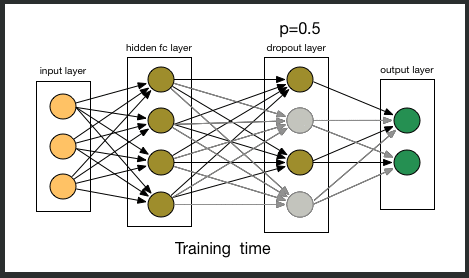

In [92]:
Image(filename = 'local/imgs/dropout_1.png')

In [93]:
from tensorflow.keras.layers import Dropout

dropout_layer = Dropout(rate=0.5)(dense_layer)

**7. Batch Normalization Layer:** la normalización por lotes (BN) es una técnica utilizada en redes neuronales para estabilizar y acelerar el proceso de entrenamiento. Normaliza las entradas de una capa ajustándolas y escalándolas durante el entrenamiento. Los detalles matemáticos detrás de la normalización por lotes implican operaciones de normalización, escalado y cambio. Profundicemos en las matemáticas de la normalización por lotes.

Supongamos que tenemos un mini lote de tamaño m con n características. La entrada a la normalización por lotes se puede resumir de la siguiente manera:

7.1. Cálculo de la media: Calcule la media μ del mini lote para cada característica:

$$
\mu = \dfrac{1}{m}\sum_{i=1}^{m}x_i
$$

Aquí, xi​ representa los valores de la i-ésima característica en todo el minilote.

7.2. Cálculo de la varianza: Calcule la varianza σ² del mini lote para cada característica:


$$
\sigma^2 = \dfrac{1}{m}\sum_{i=1}^{m}(x_i - \mu)^2
$$

7.3. Normalizar: normaliza la entrada restando la media y dividiéndola por la desviación estándar (σ)

$$
\hat{x_i} = \dfrac{x_i - \mu}{\sqrt{\sigma^2 + \epsilon}}
$$

Aquí, $\epsilon$ es una pequeña constante agregada para evitar la división por cero.

7.4. Escalar y desplazar: introduzca parámetros que se puedan aprender (γ y β) para escalar y desplazar los valores normalizados:


$$
y_i = \gamma x_i + \beta
$$

Aquí, γ es el parámetro de escala y β es el parámetro de desplazamiento.

La operación de normalización por lotes normalmente se inserta antes de la función de activación en una capa de red neuronal. Se ha demostrado que tiene efectos de regularización y puede mitigar problemas como el cambio de covariables internas, haciendo que el entrenamiento sea más estable y rápido. Aquí hay un código simple para la normalización por lotes en CNN o cualquier red neuronal profunda.

In [94]:
from tensorflow.keras.layers import BatchNormalization

batch_norm_layer = BatchNormalization()(dropout_layer)

En resumen, la normalización por lotes normaliza la entrada, escala y cambia los valores normalizados e introduce parámetros que se pueden aprender para permitir que la red se adapte durante el entrenamiento. El uso de la normalización por lotes se ha convertido en una práctica estándar en las arquitecturas de aprendizaje profundo.

**8. Flatten Layer:** Las capas aplanadas convierten mapas de características multidimensionales en un vector unidimensional, preparando los datos para ingresarlos en capas completamente conectadas.

In [95]:
flatten_layer = Flatten()(batch_norm_layer)

**9. Upsampling Layer:** el muestreo ascendente es una técnica utilizada en el aprendizaje profundo para aumentar la resolución espacial de los mapas de características. A menudo se emplea en tareas como segmentación y generación de imágenes. A continuación se ofrecen breves descripciones de los tipos comunes de métodos de muestreo ascendente:

**9.1. Nearest Neighbors (NN) Upsampling:** el muestreo ascendente de vecinos más cercanos (NN), también conocido como muestreo ascendente por duplicación o replicación, es un método simple e intuitivo. En este enfoque, cada píxel de la entrada se duplica o replica para generar una salida mayor. Si bien es sencillo, el muestreo ascendente de NN puede generar artefactos en bloques y una pérdida de detalles finos, ya que no interpola entre píxeles vecinos.

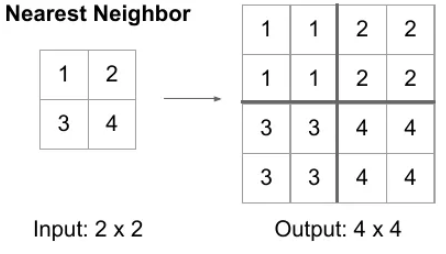

In [96]:
Image(filename = 'local/imgs/NN_upsampling.png')

**9.2. Transposed Convolution (Deconvolution) Upsampling:** la convolución transpuesta, a menudo denominada deconvolución, es un método de muestreo ascendente que se puede aprender. Implica el uso de una operación convolucional con parámetros que se pueden aprender para aumentar las dimensiones espaciales de la entrada. Los pesos en la capa convolucional transpuesta se entrenan durante el proceso de optimización, lo que permite a la red aprender patrones de muestreo ascendente específicos de la tarea.

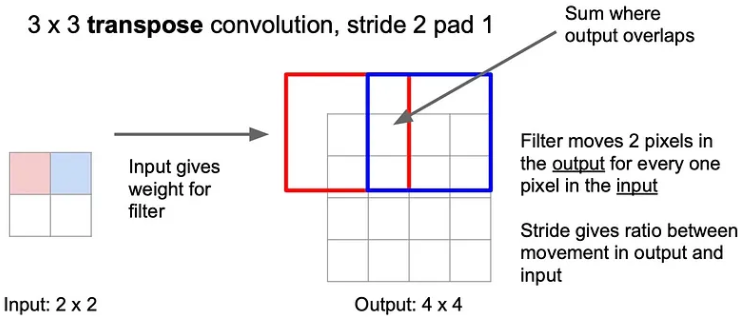

In [97]:
Image(filename = 'local/imgs/deconvolution_upsampling.png')

In [98]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2DTranspose

# Transposed Convolution Upsampling
transposed_conv_upsampling = Conv2DTranspose(filters=32, kernel_size=(3, 3), strides=(2, 2), padding='same')


Cada método de muestreo tiene sus ventajas y desventajas, y la elección depende de los requisitos específicos de la tarea y las características de los datos.

### **Padding and stride**

Estos son conceptos cruciales en las redes neuronales convolucionales (CNN) que influyen en el tamaño de los mapas de características de salida después de las operaciones de convolución. Analicemos tres tipos de acolchado y también expliquemos el concepto de zancada.



**Valid Padding (No Padding):** en el relleno válido, también conocido como sin relleno, no se agrega ningún relleno adicional a la entrada antes de aplicar la operación de convolución. Como resultado, la operación de convolución solo se realiza cuando el filtro y la entrada se superponen completamente. Esto a menudo conduce a una reducción en las dimensiones espaciales del mapa de características de salida.

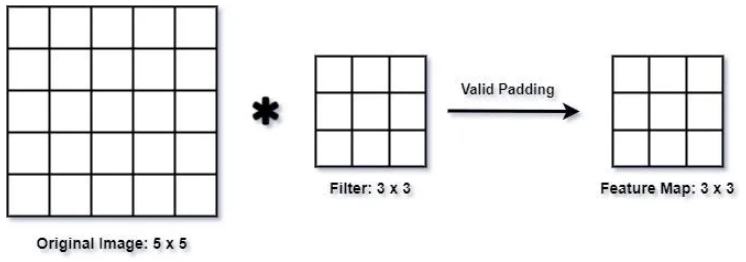

In [99]:
Image(filename = 'local/imgs/no_padding.png')

In [100]:
from tensorflow.keras.layers import Conv2D

# Valid Padding
valid_padding_conv = Conv2D(filters=32, kernel_size=(3, 3),
                             strides=(1, 1), padding='valid')

**Same Padding:** el mismo relleno garantiza que el mapa de características de salida tenga las mismas dimensiones espaciales que la entrada. Lo logra agregando relleno de ceros a la entrada de modo que el filtro pueda deslizarse sobre la entrada sin salirse de sus límites. La cantidad de relleno se calcula para mantener las mismas dimensiones.

In [101]:
from tensorflow.keras.layers import Conv2D

#Padding in Keras
same_padding_conv = Conv2D(filters=32, kernel_size=(3, 3), 
                          strides=(1, 1), padding='same')

**Stride:** El stride define el tamaño del paso con el que el filtro se mueve a través de la entrada durante la convolución. Un paso más grande da como resultado una reducción de las dimensiones espaciales del mapa de características de salida. Stride se puede ajustar para controlar el nivel de reducción de resolución en la red.

In [102]:
from tensorflow.keras.layers import Conv2D

# Example of Convolution with Stride in Keras
conv_with_stride = Conv2D(filters=32, kernel_size=(3, 3), 
                                  strides=(2, 2), padding='same')

En este ejemplo, la stride se establece en (2, 2), lo que indica que el filtro mueve dos píxeles a la vez en dirección horizontal y vertical. Stride es un parámetro crítico para controlar la resolución espacial de los mapas de características e influir en el campo receptivo de la red.

## Image analytics tasks

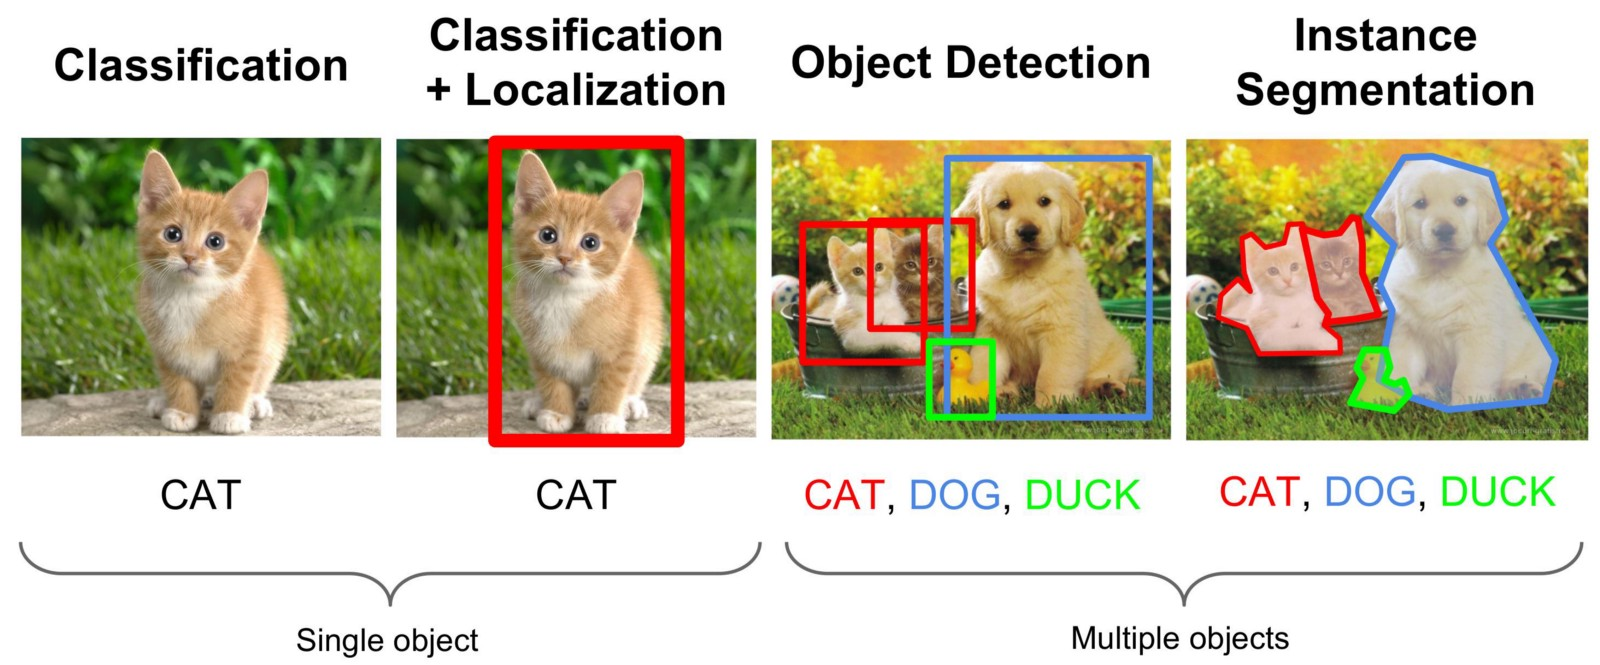

In [103]:
Image(filename='local/imgs/imgs_tasks.jpeg', width=800)

### Explore [COCO Dataset](http://cocodataset.org/)

**also**

- Image APIs [Clarifai](https://clarifai.com/demo) [Amazon Rekognition](https://aws.amazon.com/rekognition/), [Google Cloud Vision](https://cloud.google.com/vision/docs/drag-and-drop)
- Image Captioning (con CNN + RNN!!!) [caption bot](https://www.captionbot.ai/)



## Convolutional Neural Networks

see https://cloud.google.com/blog/big-data/2017/01/learn-tensorflow-and-deep-learning-without-a-phd

see [convolutions summary](https://towardsdatascience.com/conv2d-to-finally-understand-what-happens-in-the-forward-pass-1bbaafb0b148) | [filter activation demo](http://ml4a.github.io/demos/convolution_all/) | [confusion matrix](http://ml4a.github.io/demos/confusion_cifar/)

see [The 9 Deep Learning Papers You Should Know](https://adeshpande3.github.io/The-9-Deep-Learning-Papers-You-Need-To-Know-About.html)

### RECOMMENDATION

- close all applications
- install Maxthon browser http://www.maxthon.com
- open only VirtualBox and Maxthon


## First level filters and activations maps

the filters in the middle  are applied to the image on the left. Observe, for instance, in what parts of the image the seventh filter of the first row is activated (the one before the last one in the first row).

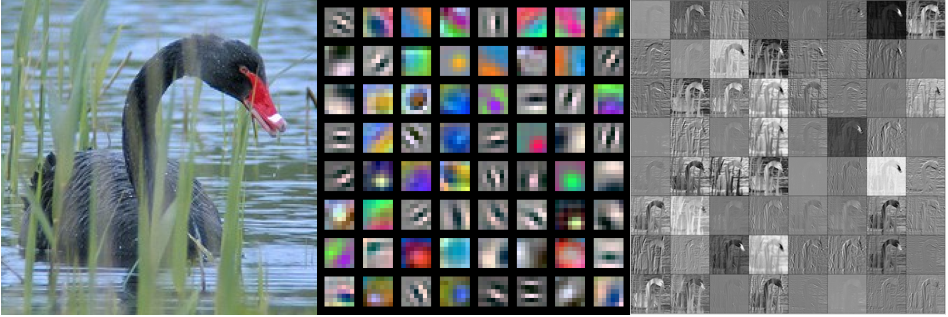

In [104]:
Image(filename='local/imgs/cnn_swan.png', width=800)

## Hierarchy of filters and activation maps

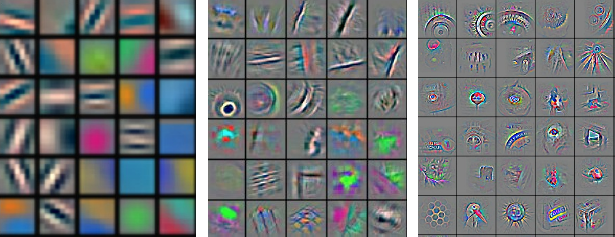

In [105]:
Image(filename='local/imgs/cnn_features.png', width=600)

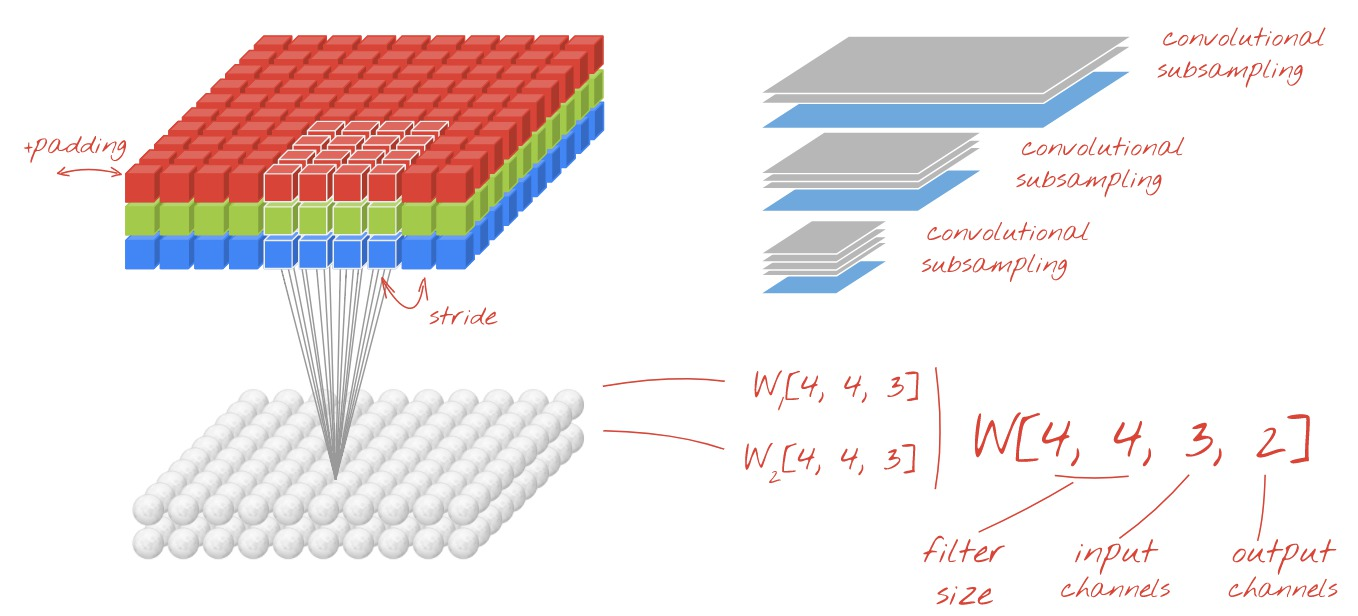

In [106]:
Image(filename='local/imgs/conv1.jpg', width=800)

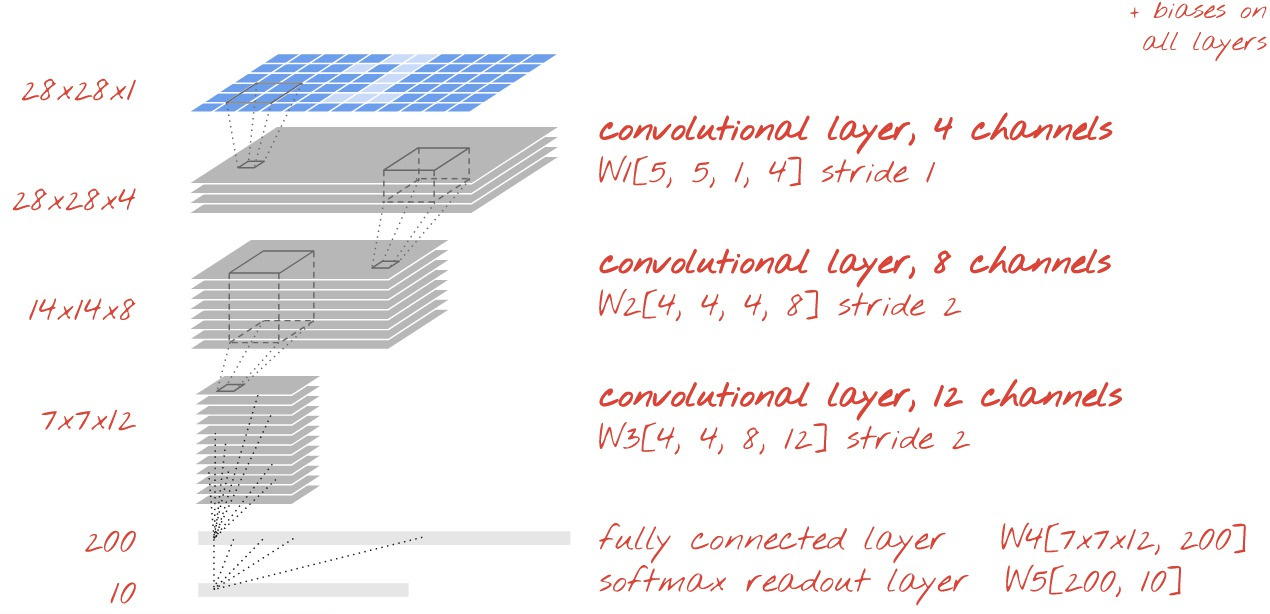

In [107]:
Image(filename='local/imgs/conv2.jpg', width=800)

otros ejemplos de filtros de primer nivel

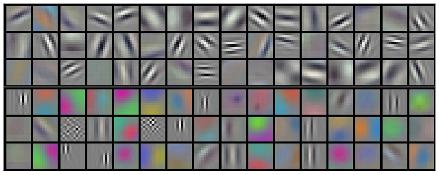

In [108]:
Image(filename='local/imgs/cnn_features2.png', width=600)

We have a small image dataset based on [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html), where each image size is **32x32x3**.

In [109]:
!wget -nc https://s3.amazonaws.com/rlx/mini_cifar.h5

El fichero ‘mini_cifar.h5’ ya está ahí, no se recupera.



In [110]:
import h5py
with h5py.File('mini_cifar.h5','r') as h5f:
    x_cifar = h5f["x"][:]
    y_cifar = h5f["y"][:]

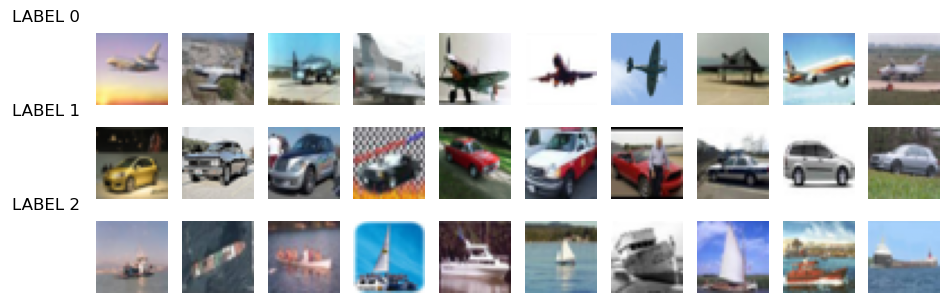

In [111]:
mlutils.show_labeled_image_mosaic(x_cifar, y_cifar)

In [112]:
print (np.min(x_cifar), np.max(x_cifar))

0.0 1.0


In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x_cifar, y_cifar, test_size=.25)
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print ("\ndistribution of train classes")
print (pd.Series(y_train).value_counts())
print ("\ndistribution of test classes")
print (pd.Series(y_test).value_counts())

(2253, 32, 32, 3) (2253,) (751, 32, 32, 3) (751,)

distribution of train classes
0    766
2    758
1    729
Name: count, dtype: int64

distribution of test classes
2    267
1    245
0    239
Name: count, dtype: int64


build a Keras model

In [115]:
def get_conv_model_A(num_classes, img_size=32, compile=True):
    tf.keras.backend.clear_session()
    print ("using",num_classes,"classes")
    inputs = tf.keras.Input(shape=(img_size,img_size,3), name="input_1")
    layers = tf.keras.layers.Conv2D(15,(3,3), activation="relu", padding="SAME")(inputs)
    layers = tf.keras.layers.Flatten()(layers)
    layers = tf.keras.layers.Dense(16, activation=tf.nn.relu)(layers)
    layers = tf.keras.layers.Dropout(0.2)(layers)
    predictions = tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output_1")(layers)
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    if compile:
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    return model

In [116]:
num_classes = len(np.unique(y_cifar))
model = get_conv_model_A(num_classes)

using 3 classes


observe the weights initialized and their weights

In [117]:
weights = model.get_weights()
for i in weights:
    print (i.shape)

(3, 3, 3, 15)
(15,)
(15360, 16)
(16,)
(16, 3)
(3,)


we keep the filters on the first layer to later compare them with the same filters after training.

In [118]:
initial_w0 = model.get_weights()[0].copy()

In [119]:
y_test.shape, y_train.shape, x_test.shape, x_train.shape

((751,), (2253,), (751, 32, 32, 3), (2253, 32, 32, 3))

In [120]:
num_classes = len(np.unique(y_cifar))

def train(model, batch_size, epochs, model_name=""):
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs/"+model_name+"_"+"{}".format(time()))
    model.reset_states()
    model.fit(x_train, y_train, epochs=epochs, callbacks=[tensorboard],
              batch_size=batch_size,
              validation_data=(x_test, y_test))
    metrics = model.evaluate(x_test, y_test)
    return {k:v for k,v in zip (model.metrics_names, metrics)}


observe the shapes of model weights obtained above and try to see how they are related to the **output shape** and the **number of parameters**

In [121]:
model = get_conv_model_A(num_classes)
model.summary()

using 3 classes
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 15)        420       
                                                                 
 flatten (Flatten)           (None, 15360)             0         
                                                                 
 dense (Dense)               (None, 16)                245776    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 output_1 (Dense)            (None, 3)                 51        
                                                                 
Total params: 246247 (961.90 KB)
Trainable pa

In [122]:
train(model, batch_size=32, epochs=10, model_name="model_A")

Epoch 1/10


71/71 [==============================] - 3s 18ms/step - loss: 1.0959 - accuracy: 0.3604 - val_loss: 1.0495 - val_accuracy: 0.4700
Epoch 2/10
71/71 [==============================] - 1s 11ms/step - loss: 1.0009 - accuracy: 0.4953 - val_loss: 0.9495 - val_accuracy: 0.5646
Epoch 3/10
71/71 [==============================] - 1s 10ms/step - loss: 0.9344 - accuracy: 0.5624 - val_loss: 0.8921 - val_accuracy: 0.5885
Epoch 4/10
71/71 [==============================] - 1s 12ms/step - loss: 0.8927 - accuracy: 0.5681 - val_loss: 0.8703 - val_accuracy: 0.6538
Epoch 5/10
71/71 [==============================] - 1s 12ms/step - loss: 0.8509 - accuracy: 0.5917 - val_loss: 0.8368 - val_accuracy: 0.6658
Epoch 6/10
71/71 [==============================] - 1s 10ms/step - loss: 0.8223 - accuracy: 0.6041 - val_loss: 0.7944 - val_accuracy: 0.6418
Epoch 7/10
71/71 [==============================] - 1s 10ms/step - loss: 0.7982 - accuracy: 0.6085 - val_loss: 0.8125 - val_accuracy: 0.6551
Epoch 8/10
71/71 [======

{'loss': 0.7518659830093384, 'accuracy': 0.6724367737770081}

 1/24 [>.............................] - ETA: 1s

24/24 [==============================] - 0s 4ms/step
Normalized confusion matrix
[[0.74476987 0.06276151 0.19246862]
 [0.09387755 0.78367347 0.12244898]
 [0.39700375 0.09737828 0.50561798]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

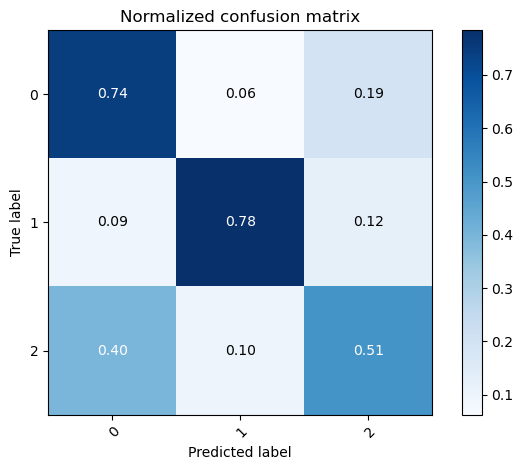

In [123]:
test_preds = model.predict(x_test).argmax(axis=1)
mlutils.plot_confusion_matrix(y_test, test_preds, classes=np.r_[0,1,2], normalize=True)

observe the outp in tensorboard

    tensorboard --logdir logs

first layer filters before training


In [124]:
%tensorboard --logdir logs

UsageError: Line magic function `%tensorboard` not found.


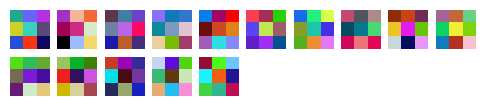

In [40]:
mlutils.display_imgs(initial_w0)

and after training

(3, 3, 3, 15)


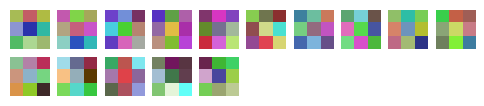

In [41]:
w0 = model.get_weights()[0]
print (w0.shape)
mlutils.display_imgs(w0)

1/1 [==============================] - 0s 21ms/step


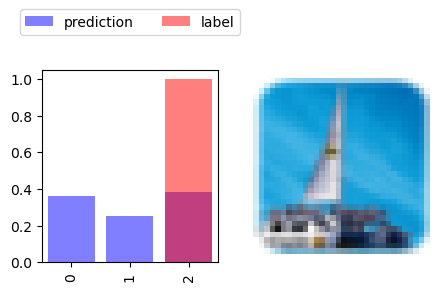

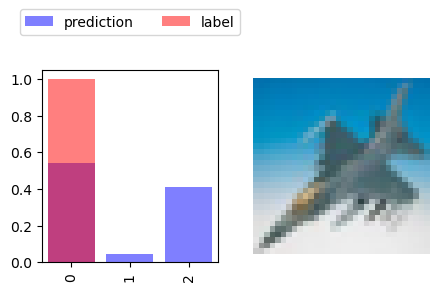

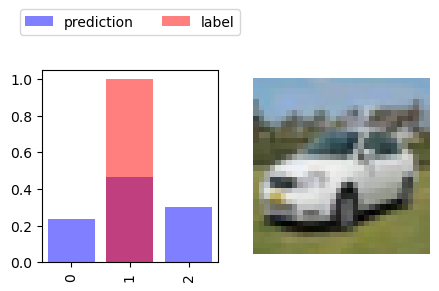

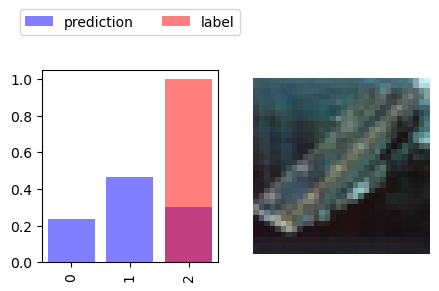

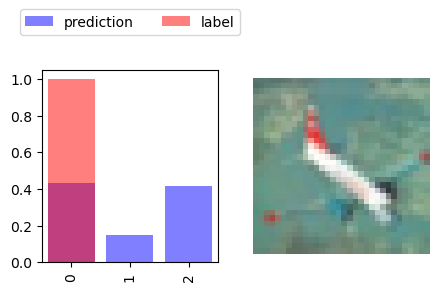

In [42]:
idxs = np.random.permutation(len(x_test))[:5]
preds = model.predict(x_test[idxs])
mlutils.show_preds(x_test[idxs],y_test[idxs], preds)

### Let's try a more complex network


In [43]:
def get_conv_model_B(num_classes, img_size=32, compile=True):
    tf.keras.backend.clear_session()
    print ("using",num_classes,"classes")
    inputs = tf.keras.Input(shape=(img_size,img_size,3), name="input_1")
    layers = tf.keras.layers.Conv2D(15,(5,5), activation="relu")(inputs)
    layers = tf.keras.layers.MaxPool2D((2,2))(layers)
    layers = tf.keras.layers.Conv2D(60,(5,5), activation="relu")(layers)
    layers = tf.keras.layers.Flatten()(layers)
    layers = tf.keras.layers.Dense(16, activation=tf.nn.relu)(layers)
    layers = tf.keras.layers.Dropout(0.2)(layers)
    predictions = tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output_1")(layers)
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    if compile:
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    return model

In [44]:
model = get_conv_model_B(num_classes)
model.summary()
train(model, batch_size=32, epochs=10, model_name="model_B")

using 3 classes
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 15)        1140      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 15)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 60)        22560     
                                                                 
 flatten (Flatten)           (None, 6000)              0         
                                                                 
 dense (Dense)               (None, 16)                96016     
                                             

Epoch 1/10
71/71 [==============================] - 2s 16ms/step - loss: 1.0127 - accuracy: 0.4922 - val_loss: 0.9101 - val_accuracy: 0.6391
Epoch 2/10
71/71 [==============================] - 1s 13ms/step - loss: 0.8754 - accuracy: 0.6325 - val_loss: 0.8527 - val_accuracy: 0.6724
Epoch 3/10
71/71 [==============================] - 1s 14ms/step - loss: 0.7753 - accuracy: 0.6920 - val_loss: 0.7363 - val_accuracy: 0.6937
Epoch 4/10
71/71 [==============================] - 1s 13ms/step - loss: 0.7035 - accuracy: 0.7124 - val_loss: 0.7052 - val_accuracy: 0.7310
Epoch 5/10
71/71 [==============================] - 1s 13ms/step - loss: 0.6427 - accuracy: 0.7483 - val_loss: 0.6430 - val_accuracy: 0.7537
Epoch 6/10
71/71 [==============================] - 1s 13ms/step - loss: 0.5837 - accuracy: 0.7634 - val_loss: 0.6141 - val_accuracy: 0.7563
Epoch 7/10
71/71 [==============================] - 1s 13ms/step - loss: 0.5357 - accuracy: 0.7954 - val_loss: 0.5982 - val_accuracy: 0.7790
Epoch 8/10
71

{'loss': 0.595271646976471, 'accuracy': 0.7669773697853088}

(5, 5, 3, 15)


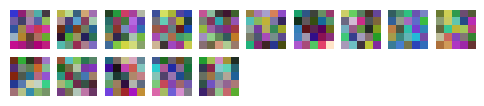

In [45]:
w0 = model.get_weights()[0]
print (w0.shape)
mlutils.display_imgs(w0)

### or with larger filters

In [46]:
def get_conv_model_C(num_classes, img_size=32, compile=True):
    tf.keras.backend.clear_session()
    print ("using",num_classes,"classes")
    inputs = tf.keras.Input(shape=(img_size,img_size,3), name="input_1")
    layers = tf.keras.layers.Conv2D(96,(11,11), activation="relu")(inputs)
    layers = tf.keras.layers.MaxPool2D((2,2))(layers)
    layers = tf.keras.layers.Conv2D(60,(11,11), activation="relu")(layers)
    layers = tf.keras.layers.Flatten()(layers)
    layers = tf.keras.layers.Dense(16, activation=tf.nn.relu)(layers)
    layers = tf.keras.layers.Dropout(0.2)(layers)
    predictions = tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output_1")(layers)
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    if compile:
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    return model

In [47]:
model = get_conv_model_C(num_classes)
model.summary()
train(model, batch_size=32, epochs=10, model_name="model_C")

using 3 classes
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 22, 22, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 1, 60)          697020    
                                                                 
 flatten (Flatten)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 16)                976       
                                             

{'loss': 0.8501301407814026, 'accuracy': 0.625832200050354}

(11, 11, 3, 96)


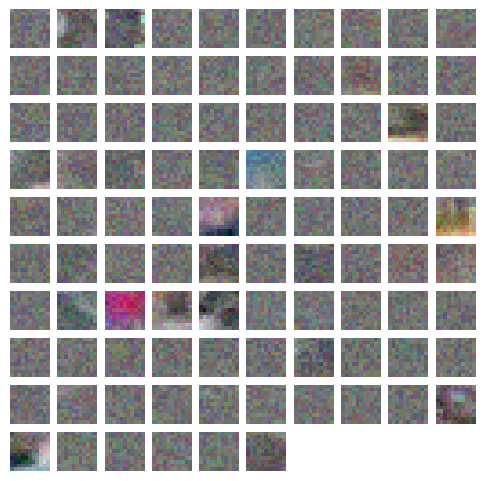

In [48]:
w0 = model.get_weights()[0]
print (w0.shape)
mlutils.display_imgs(w0)

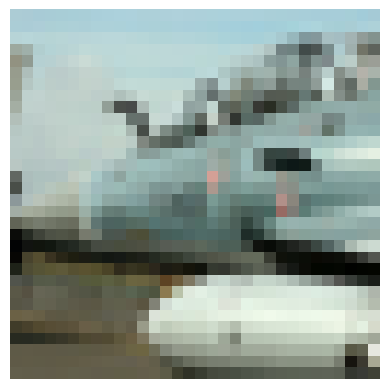

In [49]:
i = np.random.randint(len(x_test))
plt.imshow(x_test[i])
plt.axis("off");

In [50]:
acts = mlutils.get_activations(model, x_test[i:i+1])["conv2d/Relu:0"][0]

ValueError: Found unexpected instance while processing input tensors for keras functional model. Expecting KerasTensor which is from tf.keras.Input() or output from keras layer call(). Got: 0

In [51]:
plt.figure(figsize=(10,10))
for i in range(acts.shape[-1]):
    plt.subplot(10,10,i+1)
    plt.imshow(acts[:,:,i], cmap=plt.cm.Greys_r )
    plt.axis("off")

NameError: name 'acts' is not defined

<Figure size 1000x1000 with 0 Axes>

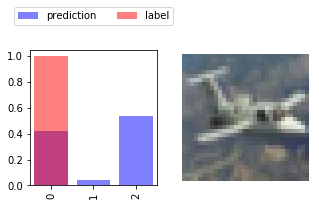

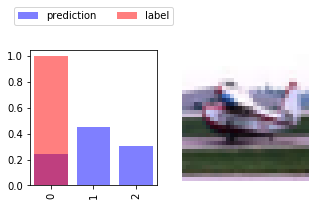

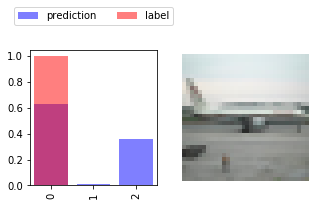

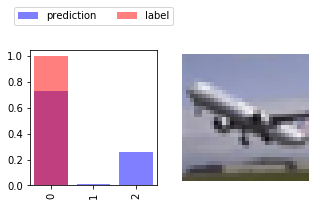

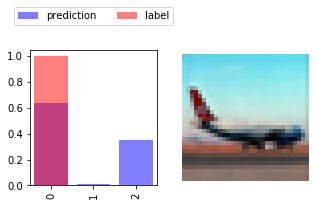

In [ ]:
idxs = np.random.permutation(len(x_test))[:5]
preds = model.predict(x_test[idxs])
mlutils.show_preds(x_test[idxs],y_test[idxs], preds)

see 

- https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html
- https://deepdreamgenerator.com/  

**Class activation maps**
https://jacobgil.github.io/deeplearning/class-activation-maps